# Index <a name="indice"></a>

[Importación de librerías](#importacion_librerias)

[Funciones](#funciones)

[Importación de dato](#importacion_datos)

[EDA](#EDA)


# 1.- Importación de librerías <a name="importacion_librerias"></a>

[Volver al índice](#indice)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import tree

# 2.- Funciones <a name="funciones"></a>

[Volver al índice](#indice)

In [3]:
from javi_func import *

# 3.- Importación de datos <a name="importacion_datos"></a>

[Volver al índice](#indice)

In [4]:
#df=pd.read_pickle(r"TablaPlana.pkl", compression="bz2")

In [5]:
df=pd.read_csv('../input/df2_sample_R20000.csv', encoding='utf-8')

In [6]:
df.shape

(20000, 174)

In [7]:
df.head()

,Unnamed: 0,case_id,date_decision,MONTH,WEEK_NUM,target,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,...,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,typesuite_864L,validfrom_1069D,_merge
0,1301612,1895641,2020-08-19,202008,85,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,920606,1514635,2019-08-31,201908,34,0,0.0,6795.60,2477.600,0.0000,...,0.0,0.0,0.0,0.0,14531.601,NaN,FO,NaN,NaN,both
2,575184,959717,2020-02-18,202002,59,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,943059,1537088,2019-09-14,201909,36,1,0.0,214471.80,3192.200,0.0000,...,0.0,0.0,0.0,0.0,323300.000,NaN,FO,NaN,NaN,both
4,1414680,2591435,2019-07-02,201907,26,0,0.0,201225.62,11481.601,5748.8003,...,1.0,34188.6,NaN,34188.6,383542.400,NaN,FO,NaN,2019-06-18,both


In [8]:
del df['Unnamed: 0']

In [9]:
df.head()

,case_id,date_decision,MONTH,WEEK_NUM,target,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,...,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,typesuite_864L,validfrom_1069D,_merge
0,1895641,2020-08-19,202008,85,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,1514635,2019-08-31,201908,34,0,0.0,6795.60,2477.600,0.0000,0.0,...,0.0,0.0,0.0,0.0,14531.601,NaN,FO,NaN,NaN,both
2,959717,2020-02-18,202002,59,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,1537088,2019-09-14,201909,36,1,0.0,214471.80,3192.200,0.0000,0.0,...,0.0,0.0,0.0,0.0,323300.000,NaN,FO,NaN,NaN,both
4,2591435,2019-07-02,201907,26,0,0.0,201225.62,11481.601,5748.8003,0.0,...,1.0,34188.6,NaN,34188.6,383542.400,NaN,FO,NaN,2019-06-18,both


## 3.1 Variable Objetivo

In [10]:
VariableObjetivo='target'
print(df[VariableObjetivo].value_counts())
print(df[VariableObjetivo].value_counts(1))

0    18102
1     1898
Name: target, dtype: int64
0    0.9051
1    0.0949
Name: target, dtype: float64


## 3.2 Variable para identificar cada entidad individualmente

In [11]:
FindPrimaryKey(df)

Número de filas: 20000
Variables con tantos valores distintos como el número de filas:
**************************************************
case_id

Muestra:
0    1895641
1    1514635
2     959717
3    1537088
4    2591435
Name: case_id, dtype: int64


In [12]:
VariableId='case_id'

# 4.- Descriptivo <a name="EDA"></a>

[Volver al índice](#indice)

## 4.1.- Información básica

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 173 entries, case_id to _merge
dtypes: float64(128), int64(4), object(41)
memory usage: 26.4+ MB


## 4.2.- Descriptivo de Campos

In [14]:
df_fields=DescribeDf(df, show_summary=True)
df_fields.to_excel('df_fields.xlsx')

Filas    = 20000
Columnas = 173
--------------------------------------------------
Campo 1/173 (Index 0): case_id

count  = 20000.0
unique = nan
top    = nan
freq   = nan
mean   = 1281970.05825
std    = 724050.892972812
min    = 46.0
25%    = 762320.0
50%    = 1354181.0
75%    = 1738069.25
max    = 2703377.0
type   = int64
nunique= 20000
nulls  = 0
nulls_ratio = 0.0
   >>> Posible clave principal <<<

--------------------------------------------------
Campo 2/173 (Index 1): date_decision

count  = 20000
unique = 636
top    = 2019-11-30
freq   = 131
mean   = nan
std    = nan
min    = nan
25%    = nan
50%    = nan
75%    = nan
max    = nan
type   = object
nunique= 636
nulls  = 0
nulls_ratio = 0.0
--------------------------------------------------
Campo 3/173 (Index 2): MONTH

count  = 20000.0
unique = nan
top    = nan
freq   = nan
mean   = 201935.92575
std    = 44.54808596938415
min    = 201901.0
25%    = 201906.0
50%    = 201910.0
75%    = 202001.0
max    = 202010.0
type   = int64
nuniq


Distribución en tanto por 1:

0.0    1.0
Name: clientscnt_136L, dtype: float64
--------------------------------------------------
Campo 35/173 (Index 34): clientscnt_157L

count  = 13239.0
unique = nan
top    = nan
freq   = nan
mean   = 0.0937381977490747
std    = 0.4727561002316049
min    = 0.0
25%    = 0.0
50%    = 0.0
75%    = 0.0
max    = 15.0
type   = float64
nunique= 10
nulls  = 6761
nulls_ratio = 0.33805

Distribución en tanto por 1:

0.0     0.944482
1.0     0.034142
2.0     0.010575
3.0     0.007629
4.0     0.001813
5.0     0.000831
6.0     0.000227
7.0     0.000151
15.0    0.000076
8.0     0.000076
Name: clientscnt_157L, dtype: float64
--------------------------------------------------
Campo 36/173 (Index 35): clientscnt_257L

count  = 13239.0
unique = nan
top    = nan
freq   = nan
mean   = 0.0036256514842510764
std    = 0.06256947715845272
min    = 0.0
25%    = 0.0
50%    = 0.0
75%    = 0.0
max    = 2.0
type   = float64
nunique= 3
nulls  = 6761
nulls_ratio = 0.33805

Distri


Distribución en tanto por 1:

True     0.966184
False    0.033816
Name: equalityempfrom_62L, dtype: float64
--------------------------------------------------
Campo 62/173 (Index 61): firstclxcampaign_1125D

count  = 5624
unique = 702
top    = 2016-01-31
freq   = 1841
mean   = nan
std    = nan
min    = nan
25%    = nan
50%    = nan
75%    = nan
max    = nan
type   = object
nunique= 702
nulls  = 14376
nulls_ratio = 0.7188
--------------------------------------------------
Campo 63/173 (Index 62): firstdatedue_489D

count  = 8734
unique = 3442
top    = 2018-02-15
freq   = 26
mean   = nan
std    = nan
min    = nan
25%    = nan
50%    = nan
75%    = nan
max    = nan
type   = object
nunique= 3442
nulls  = 11266
nulls_ratio = 0.5633
--------------------------------------------------
Campo 64/173 (Index 63): homephncnt_628L

count  = 13239.0
unique = nan
top    = nan
freq   = nan
mean   = 0.6159830802930735
std    = 0.8293626600177372
min    = 0.0
25%    = 0.0
50%    = 0.0
75%    = 1.0
max  

(410.959, 110768.0]     0.02900
(110768.0, 220576.0]    0.00250
(440192.0, 550000.0]    0.00080
(330384.0, 440192.0]    0.00060
(220576.0, 330384.0]    0.00045
Name: maxannuity_4075009A, dtype: float64
--------------------------------------------------
Campo 96/173 (Index 95): maxdbddpdlast1m_3658939P

count  = 4861.0
unique = nan
top    = nan
freq   = nan
mean   = 49.819995885620244
std    = 479.8931790209804
min    = -313.0
25%    = -8.0
50%    = -2.0
75%    = 0.0
max    = 4432.0
type   = float64
nunique= 260
nulls  = 15139
nulls_ratio = 0.75695

Distribución en tanto por 1:

(-317.746, 636.0]    0.23955
(3483.0, 4432.0]     0.00330
(2534.0, 3483.0]     0.00010
(1585.0, 2534.0]     0.00005
(636.0, 1585.0]      0.00005
Name: maxdbddpdlast1m_3658939P, dtype: float64
--------------------------------------------------
Campo 97/173 (Index 96): maxdbddpdtollast12m_3658940P

count  = 6876.0
unique = nan
top    = nan
freq   = nan
mean   = 59.83784176847004
std    = 446.7868418659122
min    =

(-0.265, 52.8]    0.37650
(52.8, 105.6]     0.05700
(105.6, 158.4]    0.01350
(158.4, 211.2]    0.00210
(211.2, 264.0]    0.00035
Name: numincomingpmts_3546848L, dtype: float64
--------------------------------------------------
Campo 122/173 (Index 121): numinstlallpaidearly3d_817L

count  = 9073.0
unique = nan
top    = nan
freq   = nan
mean   = 19.060288768874685
std    = 23.861210483660024
min    = 0.0
25%    = 4.0
50%    = 11.0
75%    = 25.0
max    = 245.0
type   = float64
nunique= 163
nulls  = 10927
nulls_ratio = 0.54635

Distribución en tanto por 1:

(-0.246, 49.0]    0.41170
(49.0, 98.0]      0.03430
(98.0, 147.0]     0.00630
(147.0, 196.0]    0.00115
(196.0, 245.0]    0.00020
Name: numinstlallpaidearly3d_817L, dtype: float64
--------------------------------------------------
Campo 123/173 (Index 122): numinstls_657L

count  = 13239.0
unique = nan
top    = nan
freq   = nan
mean   = 7.3201148122970014
std    = 14.389456388665023
min    = 0.0
25%    = 0.0
50%    = 0.0
75%    = 12.0

(-0.059000000000000004, 11.6]    0.23145
(11.6, 23.2]                     0.06745
(23.2, 34.8]                     0.00680
(34.8, 46.4]                     0.00130
(46.4, 58.0]                     0.00020
Name: numinstpaidlastcontr_4325080L, dtype: float64
--------------------------------------------------
Campo 138/173 (Index 137): numinstpaidlate1d_3546852L

count  = 9013.0
unique = nan
top    = nan
freq   = nan
mean   = 5.256629313214246
std    = 8.25273103324953
min    = 0.0
25%    = 0.0
50%    = 2.0
75%    = 7.0
max    = 88.0
type   = float64
nunique= 64
nulls  = 10987
nulls_ratio = 0.54935

Distribución en tanto por 1:

(-0.089, 17.6]    0.41610
(17.6, 35.2]      0.02815
(35.2, 52.8]      0.00540
(52.8, 70.4]      0.00090
(70.4, 88.0]      0.00010
Name: numinstpaidlate1d_3546852L, dtype: float64
--------------------------------------------------
Campo 139/173 (Index 138): numinstregularpaid_973L

count  = 8976.0
unique = nan
top    = nan
freq   = nan
mean   = 26.125222816399287
s

(-0.002, 0.2]    0.36810
(0.2, 0.4]       0.04420
(0.4, 0.6]       0.01910
(0.6, 0.8]       0.00925
(0.8, 1.0]       0.00675
Name: pctinstlsallpaidlate6d_3546844L, dtype: float64
--------------------------------------------------
Campo 157/173 (Index 156): pmtnum_254L

count  = 12833.0
unique = nan
top    = nan
freq   = nan
mean   = 17.153744253097482
std    = 9.678399665725596
min    = 3.0
25%    = 12.0
50%    = 12.0
75%    = 24.0
max    = 60.0
type   = float64
nunique= 30
nulls  = 7167
nulls_ratio = 0.35835

Distribución en tanto por 1:

12.0    0.349490
24.0    0.209304
6.0     0.138939
18.0    0.069820
16.0    0.060157
36.0    0.056417
48.0    0.025871
9.0     0.020104
30.0    0.019325
11.0    0.012935
10.0    0.009974
14.0    0.007169
8.0     0.005455
20.0    0.002416
31.0    0.002260
60.0    0.002182
15.0    0.001325
32.0    0.001091
42.0    0.001091
28.0    0.001013
7.0     0.000857
26.0    0.000701
44.0    0.000545
34.0    0.000390
40.0    0.000390
4.0     0.000234
3.0     0.00

## 4.3.- Listas de variables

In [15]:
Variables=df_fields.index.values
Variables

array(['case_id', 'date_decision', 'MONTH', 'WEEK_NUM', 'target',
       'actualdpdtolerance_344P', 'amtinstpaidbefduel24m_4187115A',
       'annuity_780A', 'annuitynextmonth_57A', 'applicationcnt_361L',
       'applications30d_658L', 'applicationscnt_1086L',
       'applicationscnt_464L', 'applicationscnt_629L',
       'applicationscnt_867L', 'avgdbddpdlast24m_3658932P',
       'avgdbddpdlast3m_4187120P', 'avgdbdtollast24m_4525197P',
       'avgdpdtolclosure24_3658938P', 'avginstallast24m_3658937A',
       'avglnamtstart24m_4525187A', 'avgmaxdpdlast9m_3716943P',
       'avgoutstandbalancel6m_4187114A', 'avgpmtlast12m_4525200A',
       'bankacctype_710L', 'cardtype_51L', 'clientscnt12m_3712952L',
       'clientscnt3m_3712950L', 'clientscnt6m_3712949L',
       'clientscnt_100L', 'clientscnt_1022L', 'clientscnt_1071L',
       'clientscnt_1130L', 'clientscnt_136L', 'clientscnt_157L',
       'clientscnt_257L', 'clientscnt_304L', 'clientscnt_360L',
       'clientscnt_493L', 'clientscnt_533L

In [16]:
VariablesNumericas=df_fields[(df_fields.type=='float64') | (df_fields.type=='int64')].index.values
VariablesNumericas

array(['case_id', 'MONTH', 'WEEK_NUM', 'target',
       'actualdpdtolerance_344P', 'amtinstpaidbefduel24m_4187115A',
       'annuity_780A', 'annuitynextmonth_57A', 'applicationcnt_361L',
       'applications30d_658L', 'applicationscnt_1086L',
       'applicationscnt_464L', 'applicationscnt_629L',
       'applicationscnt_867L', 'avgdbddpdlast24m_3658932P',
       'avgdbddpdlast3m_4187120P', 'avgdbdtollast24m_4525197P',
       'avgdpdtolclosure24_3658938P', 'avginstallast24m_3658937A',
       'avglnamtstart24m_4525187A', 'avgmaxdpdlast9m_3716943P',
       'avgoutstandbalancel6m_4187114A', 'avgpmtlast12m_4525200A',
       'clientscnt12m_3712952L', 'clientscnt3m_3712950L',
       'clientscnt6m_3712949L', 'clientscnt_100L', 'clientscnt_1022L',
       'clientscnt_1071L', 'clientscnt_1130L', 'clientscnt_136L',
       'clientscnt_157L', 'clientscnt_257L', 'clientscnt_304L',
       'clientscnt_360L', 'clientscnt_493L', 'clientscnt_533L',
       'clientscnt_887L', 'clientscnt_946L', 'cntincpayco

In [17]:
VariablesCategoricas=df_fields[(df_fields.type=='object')].index.values
VariablesCategoricas

array(['date_decision', 'bankacctype_710L', 'cardtype_51L',
       'credtype_322L', 'datefirstoffer_1144D',
       'datelastinstal40dpd_247D', 'datelastunpaid_3546854D',
       'disbursementtype_67L', 'dtlastpmtallstes_4499206D',
       'equalitydataagreement_891L', 'equalityempfrom_62L',
       'firstclxcampaign_1125D', 'firstdatedue_489D',
       'inittransactioncode_186L', 'isbidproduct_1095L',
       'isbidproductrequest_292L', 'isdebitcard_729L',
       'lastactivateddate_801D', 'lastapplicationdate_877D',
       'lastapprcommoditycat_1041M', 'lastapprcommoditytypec_5251766M',
       'lastapprdate_640D', 'lastcancelreason_561M',
       'lastdelinqdate_224D', 'lastrejectcommoditycat_161M',
       'lastrejectcommodtypec_5251769M', 'lastrejectdate_50D',
       'lastrejectreason_759M', 'lastrejectreasonclient_4145040M',
       'lastrepayingdate_696D', 'lastst_736L', 'maxdpdinstldate_3546855D',
       'opencred_647L', 'paytype1st_925L', 'paytype_783L',
       'payvacationpostpone_41871

In [18]:
df_fields.type.value_counts()

float64    128
object      41
int64        4
Name: type, dtype: int64

In [19]:
print('Variables:            '+str(len(Variables)))
print('VariablesNumericas:   '+str(len(VariablesNumericas)))
print('VariablesCategoricas: '+str(len(VariablesCategoricas)))

Variables:            173
VariablesNumericas:   132
VariablesCategoricas: 41


## 4.4.- Detección de nulos

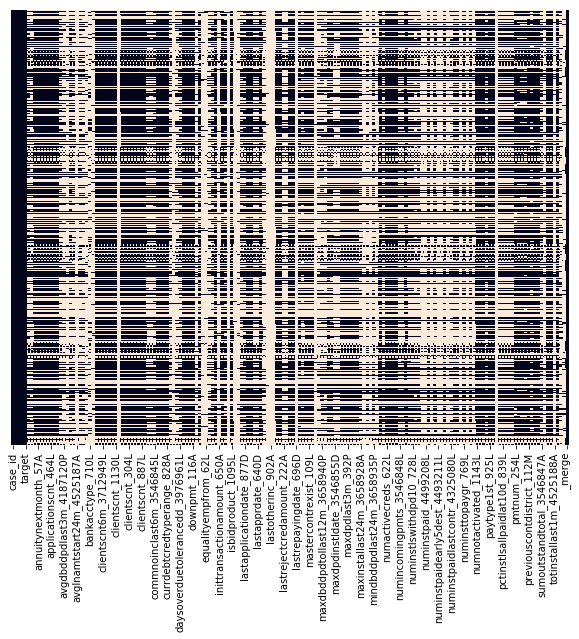

In [20]:
plt.figure(figsize=(10, 8))
sb.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [21]:
df_nulls_number=pd.DataFrame(df.isnull().sum(), columns=['nulls']).sort_values(by='nulls', ascending=False)
df_nulls_number.tail(20)

,nulls
lastcancelreason_561M,6761
lastapprcommoditytypec_5251766M,6761
lastapprcommoditycat_1041M,6761
isbidproduct_1095L,6761
inittransactioncode_186L,6761
homephncnt_628L,6761
downpmt_116A,6761
disbursedcredamount_1113A,6761
deferredmnthsnum_166L,6761
currdebtcredtyperange_828A,6761


<Figure size 1152x864 with 0 Axes>

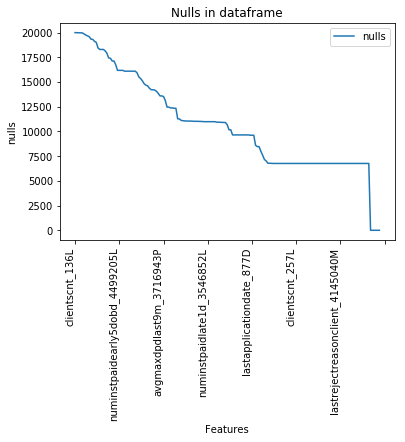

In [22]:
plt.figure(figsize=(16, 12))
df_nulls_number.plot(kind='line')
plt.title("Nulls in dataframe")
plt.xticks(rotation=90, ha='right')
plt.xlabel("Features")
plt.ylabel("nulls")
plt.show()

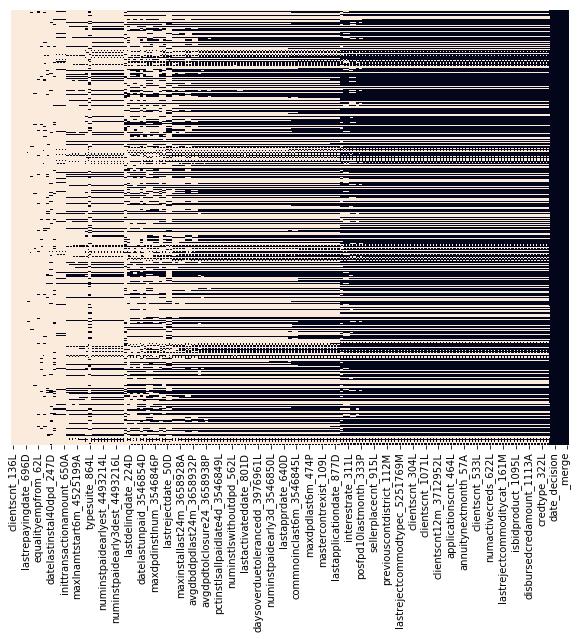

In [23]:
plt.figure(figsize=(10, 8))
sb.heatmap(df[df_nulls_number.index.values].isnull(),yticklabels=False,cbar=False)

## 4.5.- Correlaciones

In [24]:
Correlaciones=df.corr()
Correlaciones

,case_id,MONTH,WEEK_NUM,target,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,...,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A
case_id,1.000000,0.142240,0.168174,0.000217,-0.016658,0.007512,0.138285,0.125655,NaN,-0.041750,...,-0.026338,-0.022102,-0.070610,-0.004134,0.191788,-0.137659,-0.166919,0.034770,0.260672,-0.043359
MONTH,0.142240,1.000000,0.831991,0.005185,0.014459,0.018727,0.015448,-0.015505,NaN,0.010958,...,-0.008173,0.003893,0.069705,0.019502,0.041156,-0.005242,0.012068,-0.000965,0.027050,-0.036623
WEEK_NUM,0.168174,0.831991,1.000000,-0.001889,0.015543,0.020335,0.015836,-0.014558,NaN,0.010898,...,-0.008809,0.004082,0.070299,0.019701,0.040493,-0.005019,0.012325,-0.000742,0.028245,-0.015606
target,0.000217,0.005185,-0.001889,1.000000,0.047111,-0.081891,0.022492,0.006196,NaN,0.060340,...,0.025084,0.016188,0.011786,0.085356,0.013715,0.015030,0.032612,0.021197,-0.033647,0.027093
actualdpdtolerance_344P,-0.016658,0.014459,0.015543,0.047111,1.000000,-0.012864,-0.009630,0.001129,NaN,0.014085,...,-0.002659,-0.007259,-0.011312,-0.004669,-0.003509,0.023307,0.033761,0.023283,-0.008952,0.157293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sumoutstandtotal_3546847A,-0.137659,-0.005242,-0.005019,0.015030,0.023307,0.421652,0.046974,0.726578,NaN,0.086176,...,0.006061,0.011337,0.031263,0.128528,0.164929,1.000000,1.000000,0.986058,0.378028,0.129966
sumoutstandtotalest_4493215A,-0.166919,0.012068,0.012325,0.032612,0.033761,0.417064,0.038762,0.723785,NaN,0.098959,...,-0.010985,0.021799,0.047466,0.131784,0.184148,1.000000,1.000000,0.987066,0.364979,0.129966
totaldebt_9A,0.034770,-0.000965,-0.000742,0.021197,0.023283,0.413666,0.056371,0.750784,NaN,0.115191,...,0.003917,0.012884,0.005476,0.167526,0.245254,0.986058,0.987066,1.000000,0.437948,0.122182
totalsettled_863A,0.260672,0.027050,0.028245,-0.033647,-0.008952,0.756698,0.185584,0.488104,NaN,0.079464,...,0.002741,0.005475,-0.040228,0.099408,0.443604,0.378028,0.364979,0.437948,1.000000,0.331395


In [25]:
#Correlaciones tomadas de dos en dos entre las variables:
Dimension=Correlaciones.shape[0]
(Dimension*Dimension-Dimension)/2

8646.0

In [26]:
df_correlaciones = pd.DataFrame(columns=['Variable_1','Variable_2','Correlacion'])

In [27]:
Dimension=Correlaciones.shape[0]
# Bucle para recorrer las filas:
for i in range(1,Dimension):
    #print('-'*20)
    #print("i="+str(i))
    # Bucle para recorrer las columnas dentro de la fila:
    for j in range(i):
        #print(' '*3+'-'*10)
        #print("   j="+str(j))
        Variable_1=Correlaciones.index[i]
        Variable_2=Correlaciones.columns[j]
        Correlacion=Correlaciones.iloc[i,j]
        df_correlaciones.loc[len(df_correlaciones),'Variable_1']=Variable_1
        df_correlaciones.loc[len(df_correlaciones)-1,'Variable_2']=Variable_2
        df_correlaciones.loc[len(df_correlaciones)-1,'Correlacion']=Correlacion

In [28]:
df_correlaciones.shape

(8646, 3)

In [29]:
df_correlaciones=df_correlaciones.sort_values('Correlacion',ascending=False)
df_correlaciones=df_correlaciones.reset_index(drop=True)
df_correlaciones.head(30)

,Variable_1,Variable_2,Correlacion
0,totinstallast1m_4525188A,lastotherinc_902A,1
1,numinstpaidearly5dest_4493211L,numinstpaidearly5d_1087L,1
2,numinstpaidearlyest_4493214L,numinstpaidearly5dobd_4499205L,1
3,inittransactionamount_650A,disbursedcredamount_1113A,1
4,sumoutstandtotalest_4493215A,sumoutstandtotal_3546847A,1
5,numinstpaidearlyest_4493214L,numinstpaidearly_338L,1
6,interestrate_311L,eir_270L,1
7,numinstpaidearly_338L,numinstpaidearly5dobd_4499205L,1
8,totaldebt_9A,currdebt_22A,1
9,mindbdtollast24m_4525191P,mindbddpdlast24m_3658935P,0.99991


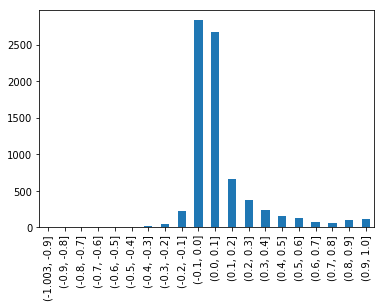

In [30]:
df_correlaciones['Correlacion'].value_counts(bins=20,sort=False).plot(kind='bar')

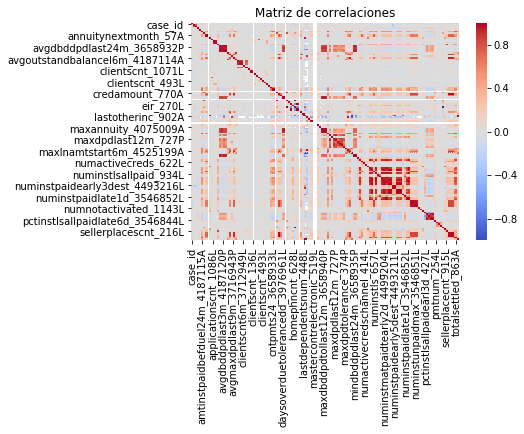

In [31]:
# Crear el mapa de calor
sb.heatmap(Correlaciones, annot=False, cmap='coolwarm')

# Configurar el título del gráfico
plt.title('Matriz de correlaciones')


# Mostrar el gráfico
plt.show()

In [32]:
# Variables with high correlation with the target
df_correlaciones[(df_correlaciones['Variable_1']==VariableObjetivo) | (df_correlaciones['Variable_2']==VariableObjetivo)].sort_values('Correlacion',ascending=False).head(10)

,Variable_1,Variable_2,Correlacion
1250,pctinstlsallpaidlate1d_3546856L,target,0.193514
1294,pctinstlsallpaidlate4d_3546849L,target,0.182357
1322,pctinstlsallpaidlate6d_3546844L,target,0.176611
1354,pctinstlsallpaidlat10d_839L,target,0.170094
1601,numinstlswithdpd10_728L,target,0.13164
1702,avgmaxdpdlast9m_3716943P,target,0.121116
1806,numinstlswithdpd5_4187116L,target,0.109722
1833,numrejects9m_859L,target,0.106884
1913,mobilephncnt_593L,target,0.0970794
1962,daysoverduetolerancedd_3976961L,target,0.0929065


In [33]:
# Variables with low correlation with the target
df_correlaciones[(df_correlaciones['Variable_1']==VariableObjetivo) | (df_correlaciones['Variable_2']==VariableObjetivo)].sort_values('Correlacion',ascending=False).tail(10)

,Variable_1,Variable_2,Correlacion
7453,numinstpaidearly3dest_4493216L,target,-0.11098
7546,pctinstlsallpaidearl3d_427L,target,-0.13975
7580,lastotherlnsexpense_631A,target,-0.155095
7694,applicationcnt_361L,target,NaN
7723,clientscnt_136L,target,NaN
7773,commnoinclast6m_3546845L,target,NaN
7826,deferredmnthsnum_166L,target,NaN
7896,interestrategrace_34L,target,NaN
8016,mastercontrelectronic_519L,target,NaN
8076,mastercontrexist_109L,target,NaN


## Grupos de correlación

In [34]:
VariablesToBeExcluded=['case_id','MONTH','WEEK_NUM',]

In [35]:
VariablesToBeIncluded = list(set(Variables) - set(VariablesToBeExcluded))
VariablesToBeIncluded.sort(key=lambda x: x == VariableObjetivo, reverse=True)
VariablesToBeIncluded

['target',
 'totalsettled_863A',
 'cntpmts24_3658933L',
 'avgmaxdpdlast9m_3716943P',
 'posfstqpd30lastmonth_3976962P',
 'firstdatedue_489D',
 'numinstpaidlastcontr_4325080L',
 'credamount_770A',
 'cntincpaycont9m_3716944L',
 'numinstlsallpaid_934L',
 'numrejects9m_859L',
 'numinstregularpaidest_4493210L',
 'lastrejectdate_50D',
 'numinstpaid_4499208L',
 'datelastinstal40dpd_247D',
 'equalityempfrom_62L',
 'lastrejectcredamount_222A',
 'maininc_215A',
 'numinstmatpaidtearly2d_4499204L',
 'eir_270L',
 'posfpd10lastmonth_333P',
 'payvacationpostpone_4187118D',
 'numinstlswithdpd10_728L',
 'actualdpdtolerance_344P',
 'avginstallast24m_3658937A',
 'downpmt_116A',
 'applicationscnt_629L',
 'posfpd30lastmonth_3976960P',
 'avgdbddpdlast24m_3658932P',
 'typesuite_864L',
 'annuitynextmonth_57A',
 'clientscnt_360L',
 'numinstpaidearly_338L',
 'homephncnt_628L',
 'paytype1st_925L',
 'disbursementtype_67L',
 'numcontrs3months_479L',
 'previouscontdistrict_112M',
 'mastercontrexist_109L',
 'isbidpro

In [36]:
Correlaciones=df[VariablesToBeIncluded].corr()
Correlaciones

,target,totalsettled_863A,cntpmts24_3658933L,avgmaxdpdlast9m_3716943P,posfstqpd30lastmonth_3976962P,numinstpaidlastcontr_4325080L,credamount_770A,cntincpaycont9m_3716944L,numinstlsallpaid_934L,numrejects9m_859L,...,maxannuity_4075009A,numinstpaidearly5d_1087L,numinstlallpaidearly3d_817L,avgdpdtolclosure24_3658938P,pctinstlsallpaidlate6d_3546844L,avglnamtstart24m_4525187A,avgpmtlast12m_4525200A,clientscnt_304L,numactivecreds_622L,maxdpdfrom6mto36m_3546853P
target,1.000000,-0.033647,-0.062966,0.121116,0.016188,-0.007065,0.028483,-0.019616,-0.098756,0.106884,...,-0.028634,-0.058619,-0.099409,0.085746,0.176611,0.056200,-0.002892,0.023244,0.013921,0.061715
totalsettled_863A,-0.033647,1.000000,0.573511,-0.019424,0.005475,0.158174,0.216573,0.429918,0.831359,0.123386,...,0.145000,0.256623,0.774870,-0.070099,-0.073685,0.372579,0.384043,0.021178,0.432202,-0.005433
cntpmts24_3658933L,-0.062966,0.573511,1.000000,-0.005559,0.007327,0.165012,0.125331,0.722755,0.588186,0.097999,...,0.121003,0.168376,0.493824,-0.136156,-0.201840,0.144041,0.092204,0.018536,0.448283,-0.076250
avgmaxdpdlast9m_3716943P,0.121116,-0.019424,-0.005559,1.000000,0.007622,0.038703,-0.032153,-0.011128,-0.046211,0.004809,...,-0.039719,-0.034826,-0.043754,0.035102,0.306301,0.011712,-0.012892,-0.001943,-0.064205,0.045817
posfstqpd30lastmonth_3976962P,0.016188,0.005475,0.007327,0.007622,1.000000,-0.005610,0.003265,0.013688,0.013216,0.027237,...,0.045723,0.008554,0.010445,0.025247,-0.002426,0.012548,-0.035574,-0.001967,0.014781,0.030911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avglnamtstart24m_4525187A,0.056200,0.372579,0.144041,0.011712,0.012548,-0.021259,0.251735,0.083445,0.169902,0.013326,...,0.174821,-0.010620,0.147602,0.072450,0.032470,1.000000,0.368481,0.027465,0.123218,-0.035905
avgpmtlast12m_4525200A,-0.002892,0.384043,0.092204,-0.012892,-0.035574,-0.048505,0.193373,0.070830,0.152836,0.010446,...,0.055294,-0.045845,0.133233,0.017094,-0.008673,0.368481,1.000000,0.003525,-0.000049,0.046332
clientscnt_304L,0.023244,0.021178,0.018536,-0.001943,-0.001967,0.016638,0.008376,0.020479,0.018693,0.064339,...,-0.034133,0.011051,0.020064,-0.004685,-0.004421,0.027465,0.003525,1.000000,0.020064,-0.001737
numactivecreds_622L,0.013921,0.432202,0.448283,-0.064205,0.014781,-0.216836,0.075854,0.631810,0.287147,0.158707,...,0.080994,0.039089,0.243906,-0.104375,-0.157062,0.123218,-0.000049,0.020064,1.000000,-0.065462


In [37]:
CorrelationThreshold=.9
Dimension=Correlaciones.shape[0]
CorrelationGroups=[]
for NumRow in range(Dimension):
    print('*'*30)
    print(NumRow)
    Row=Correlaciones.index.values[NumRow]
    print(Row)
    First=True
    CorrelationGroup=[]
    for NumColumn in range(NumRow+1,Dimension):
        Column=Correlaciones.index.values[NumColumn]
        print('\nNumRow: '+str(NumRow)+', NumColumn: '+str(NumColumn))
        print('Row:'+str(Row)+', Column:'+str(Column))
        Correlation=Correlaciones.iloc[NumRow, NumColumn]
        print('Correlation = '+str(Correlation))
        if First==True and abs(Correlation)>=CorrelationThreshold:
            CorrelationGroup.append(Row)
            CorrelationGroup.append(Column)
            print(CorrelationGroup)
            First=False
        elif First==False and abs(Correlation)>=CorrelationThreshold:
            CorrelationGroup.append(Column)
            print(CorrelationGroup)
    if len(CorrelationGroup)>0:
        CorrelationGroups.append(CorrelationGroup)
print(CorrelationGroups)    

******************************
0
target

NumRow: 0, NumColumn: 1
Row:target, Column:totalsettled_863A
Correlation = -0.03364652114984466

NumRow: 0, NumColumn: 2
Row:target, Column:cntpmts24_3658933L
Correlation = -0.06296611042667563

NumRow: 0, NumColumn: 3
Row:target, Column:avgmaxdpdlast9m_3716943P
Correlation = 0.12111553759678297

NumRow: 0, NumColumn: 4
Row:target, Column:posfstqpd30lastmonth_3976962P
Correlation = 0.01618796021096686

NumRow: 0, NumColumn: 5
Row:target, Column:numinstpaidlastcontr_4325080L
Correlation = -0.007065262516761009

NumRow: 0, NumColumn: 6
Row:target, Column:credamount_770A
Correlation = 0.028483082987886595

NumRow: 0, NumColumn: 7
Row:target, Column:cntincpaycont9m_3716944L
Correlation = -0.019616075138002398

NumRow: 0, NumColumn: 8
Row:target, Column:numinstlsallpaid_934L
Correlation = -0.0987562574485406

NumRow: 0, NumColumn: 9
Row:target, Column:numrejects9m_859L
Correlation = 0.10688395398423468

NumRow: 0, NumColumn: 10
Row:target, Column:num

Row:avgmaxdpdlast9m_3716943P, Column:maxdpdfrom6mto36m_3546853P
Correlation = 0.04581723761872037
******************************
4
posfstqpd30lastmonth_3976962P

NumRow: 4, NumColumn: 5
Row:posfstqpd30lastmonth_3976962P, Column:numinstpaidlastcontr_4325080L
Correlation = -0.0056095383004957375

NumRow: 4, NumColumn: 6
Row:posfstqpd30lastmonth_3976962P, Column:credamount_770A
Correlation = 0.0032651082450710295

NumRow: 4, NumColumn: 7
Row:posfstqpd30lastmonth_3976962P, Column:cntincpaycont9m_3716944L
Correlation = 0.013688353980705783

NumRow: 4, NumColumn: 8
Row:posfstqpd30lastmonth_3976962P, Column:numinstlsallpaid_934L
Correlation = 0.013216491639709995

NumRow: 4, NumColumn: 9
Row:posfstqpd30lastmonth_3976962P, Column:numrejects9m_859L
Correlation = 0.02723664642797855

NumRow: 4, NumColumn: 10
Row:posfstqpd30lastmonth_3976962P, Column:numinstregularpaidest_4493210L
Correlation = 0.018240839107945002

NumRow: 4, NumColumn: 11
Row:posfstqpd30lastmonth_3976962P, Column:numinstpaid_44

Row:cntincpaycont9m_3716944L, Column:maxdbddpdtollast12m_3658940P
Correlation = -0.0958372654254106

NumRow: 7, NumColumn: 113
Row:cntincpaycont9m_3716944L, Column:maxoutstandbalancel12m_4187113A
Correlation = 0.45104753418015364

NumRow: 7, NumColumn: 114
Row:cntincpaycont9m_3716944L, Column:daysoverduetolerancedd_3976961L
Correlation = -0.09313399772580333

NumRow: 7, NumColumn: 115
Row:cntincpaycont9m_3716944L, Column:maxannuity_159A
Correlation = 0.11599551940660133

NumRow: 7, NumColumn: 116
Row:cntincpaycont9m_3716944L, Column:numactivecredschannel_414L
Correlation = 0.20408428823683794

NumRow: 7, NumColumn: 117
Row:cntincpaycont9m_3716944L, Column:clientscnt_533L
Correlation = 0.06334393560647883

NumRow: 7, NumColumn: 118
Row:cntincpaycont9m_3716944L, Column:numinstls_657L
Correlation = 0.5644132443336659

NumRow: 7, NumColumn: 119
Row:cntincpaycont9m_3716944L, Column:maxannuity_4075009A
Correlation = 0.0917102981042991

NumRow: 7, NumColumn: 120
Row:cntincpaycont9m_3716944L, 

Correlation = 0.1722117703066655

NumRow: 11, NumColumn: 125
Row:numinstpaid_4499208L, Column:avgpmtlast12m_4525200A
Correlation = 0.14547218389000743

NumRow: 11, NumColumn: 126
Row:numinstpaid_4499208L, Column:clientscnt_304L
Correlation = 0.09170865188686884

NumRow: 11, NumColumn: 127
Row:numinstpaid_4499208L, Column:numactivecreds_622L
Correlation = 0.29324319875648025

NumRow: 11, NumColumn: 128
Row:numinstpaid_4499208L, Column:maxdpdfrom6mto36m_3546853P
Correlation = -0.036533029625166996
******************************
12
lastrejectcredamount_222A

NumRow: 12, NumColumn: 13
Row:lastrejectcredamount_222A, Column:maininc_215A
Correlation = 0.0724877611848584

NumRow: 12, NumColumn: 14
Row:lastrejectcredamount_222A, Column:numinstmatpaidtearly2d_4499204L
Correlation = -0.011274277617810906

NumRow: 12, NumColumn: 15
Row:lastrejectcredamount_222A, Column:eir_270L
Correlation = 0.024828632751109483

NumRow: 12, NumColumn: 16
Row:lastrejectcredamount_222A, Column:posfpd10lastmonth_333

Correlation = -0.005091422040876456

NumRow: 16, NumColumn: 46
Row:posfpd10lastmonth_333P, Column:totinstallast1m_4525188A
Correlation = -0.02702711604010663

NumRow: 16, NumColumn: 47
Row:posfpd10lastmonth_333P, Column:interestrate_311L
Correlation = -0.0014245107883746652

NumRow: 16, NumColumn: 48
Row:posfpd10lastmonth_333P, Column:lastotherinc_902A
Correlation = nan

NumRow: 16, NumColumn: 49
Row:posfpd10lastmonth_333P, Column:numinstpaidearly3d_3546850L
Correlation = 0.00215223190793222

NumRow: 16, NumColumn: 50
Row:posfpd10lastmonth_333P, Column:disbursedcredamount_1113A
Correlation = 0.004185043155415449

NumRow: 16, NumColumn: 51
Row:posfpd10lastmonth_333P, Column:amtinstpaidbefduel24m_4187115A
Correlation = -0.0029664926114899713

NumRow: 16, NumColumn: 52
Row:posfpd10lastmonth_333P, Column:clientscnt_257L
Correlation = 0.000880139080579757

NumRow: 16, NumColumn: 53
Row:posfpd10lastmonth_333P, Column:numnotactivated_1143L
Correlation = 0.007841567044475223

NumRow: 16, NumCo

Row:downpmt_116A, Column:pctinstlsallpaidlat10d_839L
Correlation = -0.006715828540735612

NumRow: 20, NumColumn: 104
Row:downpmt_116A, Column:avgoutstandbalancel6m_4187114A
Correlation = 0.019486132130860062

NumRow: 20, NumColumn: 105
Row:downpmt_116A, Column:deferredmnthsnum_166L
Correlation = nan

NumRow: 20, NumColumn: 106
Row:downpmt_116A, Column:totaldebt_9A
Correlation = -0.007326710000555738

NumRow: 20, NumColumn: 107
Row:downpmt_116A, Column:annuity_780A
Correlation = 0.13342829417020574

NumRow: 20, NumColumn: 108
Row:downpmt_116A, Column:clientscnt12m_3712952L
Correlation = -0.002363778928028166

NumRow: 20, NumColumn: 109
Row:downpmt_116A, Column:numinstunpaidmax_3546851L
Correlation = -0.010900656189191928

NumRow: 20, NumColumn: 110
Row:downpmt_116A, Column:clientscnt_100L
Correlation = 0.013767428697391

NumRow: 20, NumColumn: 111
Row:downpmt_116A, Column:clientscnt6m_3712949L
Correlation = -0.0005258955817460768

NumRow: 20, NumColumn: 112
Row:downpmt_116A, Column:maxd

NumRow: 25, NumColumn: 71
Row:clientscnt_360L, Column:clientscnt_1130L
Correlation = 0.00917291257950173

NumRow: 25, NumColumn: 72
Row:clientscnt_360L, Column:pctinstlsallpaidlate1d_3546856L
Correlation = -0.008166557636777183

NumRow: 25, NumColumn: 73
Row:clientscnt_360L, Column:clientscnt_1071L
Correlation = 0.024472693792843014

NumRow: 25, NumColumn: 74
Row:clientscnt_360L, Column:maxdbddpdtollast6m_4187119P
Correlation = -0.004623364332738617

NumRow: 25, NumColumn: 75
Row:clientscnt_360L, Column:maxinstallast24m_3658928A
Correlation = -0.012546616249525331

NumRow: 25, NumColumn: 76
Row:clientscnt_360L, Column:commnoinclast6m_3546845L
Correlation = nan

NumRow: 25, NumColumn: 77
Row:clientscnt_360L, Column:numinstunpaidmaxest_4493212L
Correlation = 0.0011647391605543636

NumRow: 25, NumColumn: 78
Row:clientscnt_360L, Column:maxlnamtstart6m_4525199A
Correlation = -0.021810272565546095

NumRow: 25, NumColumn: 79
Row:clientscnt_360L, Column:numinstpaidearly5dest_4493211L
Correlati

Row:numinstlswithoutdpd_562L, Column:numinsttopaygrest_4493213L
Correlation = 0.286699388437278

NumRow: 30, NumColumn: 64
Row:numinstlswithoutdpd_562L, Column:clientscnt_136L
Correlation = nan

NumRow: 30, NumColumn: 65
Row:numinstlswithoutdpd_562L, Column:currdebt_22A
Correlation = 0.28948615219565527

NumRow: 30, NumColumn: 66
Row:numinstlswithoutdpd_562L, Column:numinsttopaygr_769L
Correlation = 0.28603888205961436

NumRow: 30, NumColumn: 67
Row:numinstlswithoutdpd_562L, Column:maxpmtlast3m_4525190A
Correlation = 0.13130115656085822

NumRow: 30, NumColumn: 68
Row:numinstlswithoutdpd_562L, Column:avgdbddpdlast3m_4187120P
Correlation = -0.09767102569188951

NumRow: 30, NumColumn: 69
Row:numinstlswithoutdpd_562L, Column:price_1097A
Correlation = -0.05958678383645311

NumRow: 30, NumColumn: 70
Row:numinstlswithoutdpd_562L, Column:maxdpdlast12m_727P
Correlation = -0.05541343300170714

NumRow: 30, NumColumn: 71
Row:numinstlswithoutdpd_562L, Column:clientscnt_1130L
Correlation = -0.029817

Row:applications30d_658L, Column:maxdebt4_972A
Correlation = 0.03422621920938607

NumRow: 35, NumColumn: 81
Row:applications30d_658L, Column:lastdependentsnum_448L
Correlation = 0.018756967518588824

NumRow: 35, NumColumn: 82
Row:applications30d_658L, Column:mastercontrelectronic_519L
Correlation = nan

NumRow: 35, NumColumn: 83
Row:applications30d_658L, Column:clientscnt_887L
Correlation = -0.0072731339505700664

NumRow: 35, NumColumn: 84
Row:applications30d_658L, Column:monthsannuity_845L
Correlation = 0.021092545144623838

NumRow: 35, NumColumn: 85
Row:applications30d_658L, Column:clientscnt_946L
Correlation = -0.0020777420578742315

NumRow: 35, NumColumn: 86
Row:applications30d_658L, Column:sellerplacecnt_915L
Correlation = 0.4840237167007782

NumRow: 35, NumColumn: 87
Row:applications30d_658L, Column:applicationscnt_867L
Correlation = 0.2658034094512461

NumRow: 35, NumColumn: 88
Row:applications30d_658L, Column:pmtnum_254L
Correlation = 0.050086876062470954

NumRow: 35, NumColumn

Row:numinstregularpaid_973L, Column:avglnamtstart24m_4525187A
Correlation = 0.17279050705552956

NumRow: 40, NumColumn: 125
Row:numinstregularpaid_973L, Column:avgpmtlast12m_4525200A
Correlation = 0.1456438982901604

NumRow: 40, NumColumn: 126
Row:numinstregularpaid_973L, Column:clientscnt_304L
Correlation = 0.014372957330920604

NumRow: 40, NumColumn: 127
Row:numinstregularpaid_973L, Column:numactivecreds_622L
Correlation = 0.23502704637092003

NumRow: 40, NumColumn: 128
Row:numinstregularpaid_973L, Column:maxdpdfrom6mto36m_3546853P
Correlation = -0.023648076411820707
******************************
41
clientscnt_1022L

NumRow: 41, NumColumn: 42
Row:clientscnt_1022L, Column:sellerplacescnt_216L
Correlation = 0.1664982180320366

NumRow: 41, NumColumn: 43
Row:clientscnt_1022L, Column:lastotherlnsexpense_631A
Correlation = -0.11210436111755373

NumRow: 41, NumColumn: 44
Row:clientscnt_1022L, Column:mindbddpdlast24m_3658935P
Correlation = 0.03133901759882848

NumRow: 41, NumColumn: 45
Row:

NumRow: 46, NumColumn: 109
Row:totinstallast1m_4525188A, Column:numinstunpaidmax_3546851L
Correlation = 0.06772853487474094

NumRow: 46, NumColumn: 110
Row:totinstallast1m_4525188A, Column:clientscnt_100L
Correlation = -0.013328746160412847

NumRow: 46, NumColumn: 111
Row:totinstallast1m_4525188A, Column:clientscnt6m_3712949L
Correlation = -0.020075856386472333

NumRow: 46, NumColumn: 112
Row:totinstallast1m_4525188A, Column:maxdbddpdtollast12m_3658940P
Correlation = 0.08704219624803206

NumRow: 46, NumColumn: 113
Row:totinstallast1m_4525188A, Column:maxoutstandbalancel12m_4187113A
Correlation = 0.33007218986449804

NumRow: 46, NumColumn: 114
Row:totinstallast1m_4525188A, Column:daysoverduetolerancedd_3976961L
Correlation = 0.06923258999428342

NumRow: 46, NumColumn: 115
Row:totinstallast1m_4525188A, Column:maxannuity_159A
Correlation = 0.2505267836428649

NumRow: 46, NumColumn: 116
Row:totinstallast1m_4525188A, Column:numactivecredschannel_414L
Correlation = -0.0599976687002098

NumRo

Row:clientscnt3m_3712950L, Column:maxdbddpdtollast6m_4187119P
Correlation = 0.015998907693051553

NumRow: 54, NumColumn: 75
Row:clientscnt3m_3712950L, Column:maxinstallast24m_3658928A
Correlation = 0.00027859813964807676

NumRow: 54, NumColumn: 76
Row:clientscnt3m_3712950L, Column:commnoinclast6m_3546845L
Correlation = nan

NumRow: 54, NumColumn: 77
Row:clientscnt3m_3712950L, Column:numinstunpaidmaxest_4493212L
Correlation = 0.059474838233481354

NumRow: 54, NumColumn: 78
Row:clientscnt3m_3712950L, Column:maxlnamtstart6m_4525199A
Correlation = 0.00728147745329239

NumRow: 54, NumColumn: 79
Row:clientscnt3m_3712950L, Column:numinstpaidearly5dest_4493211L
Correlation = -0.0098634227042278

NumRow: 54, NumColumn: 80
Row:clientscnt3m_3712950L, Column:maxdebt4_972A
Correlation = 0.004908187218120757

NumRow: 54, NumColumn: 81
Row:clientscnt3m_3712950L, Column:lastdependentsnum_448L
Correlation = -0.044458337728270604

NumRow: 54, NumColumn: 82
Row:clientscnt3m_3712950L, Column:mastercontrel

NumRow: 59, NumColumn: 116
Row:numincomingpmts_3546848L, Column:numactivecredschannel_414L
Correlation = 0.022726941836564502

NumRow: 59, NumColumn: 117
Row:numincomingpmts_3546848L, Column:clientscnt_533L
Correlation = 0.01376011995733694

NumRow: 59, NumColumn: 118
Row:numincomingpmts_3546848L, Column:numinstls_657L
Correlation = 0.3655909950591644

NumRow: 59, NumColumn: 119
Row:numincomingpmts_3546848L, Column:maxannuity_4075009A
Correlation = 0.07561844966589357

NumRow: 59, NumColumn: 120
Row:numincomingpmts_3546848L, Column:numinstpaidearly5d_1087L
Correlation = 0.3006463058894172

NumRow: 59, NumColumn: 121
Row:numincomingpmts_3546848L, Column:numinstlallpaidearly3d_817L
Correlation = 0.8946614548109949

NumRow: 59, NumColumn: 122
Row:numincomingpmts_3546848L, Column:avgdpdtolclosure24_3658938P
Correlation = -0.056758816766179415

NumRow: 59, NumColumn: 123
Row:numincomingpmts_3546848L, Column:pctinstlsallpaidlate6d_3546844L
Correlation = -0.01545526887607141

NumRow: 59, NumC


NumRow: 67, NumColumn: 89
Row:maxpmtlast3m_4525190A, Column:numactiverelcontr_750L
Correlation = -0.0053087525429657105

NumRow: 67, NumColumn: 90
Row:maxpmtlast3m_4525190A, Column:maxdbddpdlast1m_3658939P
Correlation = -0.034318166835493186

NumRow: 67, NumColumn: 91
Row:maxpmtlast3m_4525190A, Column:interestrategrace_34L
Correlation = nan

NumRow: 67, NumColumn: 92
Row:maxpmtlast3m_4525190A, Column:pctinstlsallpaidearl3d_427L
Correlation = -0.021317947245174867

NumRow: 67, NumColumn: 93
Row:maxpmtlast3m_4525190A, Column:inittransactionamount_650A
Correlation = 0.010831650991782949

NumRow: 67, NumColumn: 94
Row:maxpmtlast3m_4525190A, Column:pctinstlsallpaidlate4d_3546849L
Correlation = -0.05362697259369567

NumRow: 67, NumColumn: 95
Row:maxpmtlast3m_4525190A, Column:mobilephncnt_593L
Correlation = 0.039312763658073124

NumRow: 67, NumColumn: 96
Row:maxpmtlast3m_4525190A, Column:applicationscnt_464L
Correlation = 0.009580885342107437

NumRow: 67, NumColumn: 97
Row:maxpmtlast3m_45251

Correlation = 0.9906390822688055
['numinstunpaidmaxest_4493212L', 'numinstunpaidmax_3546851L']

NumRow: 77, NumColumn: 110
Row:numinstunpaidmaxest_4493212L, Column:clientscnt_100L
Correlation = 0.006524032832375327

NumRow: 77, NumColumn: 111
Row:numinstunpaidmaxest_4493212L, Column:clientscnt6m_3712949L
Correlation = 0.047107027539963445

NumRow: 77, NumColumn: 112
Row:numinstunpaidmaxest_4493212L, Column:maxdbddpdtollast12m_3658940P
Correlation = 0.000892567457751425

NumRow: 77, NumColumn: 113
Row:numinstunpaidmaxest_4493212L, Column:maxoutstandbalancel12m_4187113A
Correlation = 0.7036785432274071

NumRow: 77, NumColumn: 114
Row:numinstunpaidmaxest_4493212L, Column:daysoverduetolerancedd_3976961L
Correlation = -0.0016284810582029511

NumRow: 77, NumColumn: 115
Row:numinstunpaidmaxest_4493212L, Column:maxannuity_159A
Correlation = 0.10082236043587707

NumRow: 77, NumColumn: 116
Row:numinstunpaidmaxest_4493212L, Column:numactivecredschannel_414L
Correlation = 0.22407465352796266

NumR


NumRow: 86, NumColumn: 97
Row:sellerplacecnt_915L, Column:maxdpdlast6m_474P
Correlation = -0.006179214578403601

NumRow: 86, NumColumn: 98
Row:sellerplacecnt_915L, Column:applicationcnt_361L
Correlation = nan

NumRow: 86, NumColumn: 99
Row:sellerplacecnt_915L, Column:numinstlswithdpd5_4187116L
Correlation = 0.02569210670799041

NumRow: 86, NumColumn: 100
Row:sellerplacecnt_915L, Column:sumoutstandtotalest_4493215A
Correlation = 0.13178438613885188

NumRow: 86, NumColumn: 101
Row:sellerplacecnt_915L, Column:mindbdtollast24m_4525191P
Correlation = -0.01888801729212232

NumRow: 86, NumColumn: 102
Row:sellerplacecnt_915L, Column:avgdbdtollast24m_4525197P
Correlation = -0.006536340445069521

NumRow: 86, NumColumn: 103
Row:sellerplacecnt_915L, Column:pctinstlsallpaidlat10d_839L
Correlation = 0.01341275721498787

NumRow: 86, NumColumn: 104
Row:sellerplacecnt_915L, Column:avgoutstandbalancel6m_4187114A
Correlation = 0.005395562987053212

NumRow: 86, NumColumn: 105
Row:sellerplacecnt_915L, Col

Row:numinstlswithdpd5_4187116L, Column:numactivecreds_622L
Correlation = -0.013586990949714692

NumRow: 99, NumColumn: 128
Row:numinstlswithdpd5_4187116L, Column:maxdpdfrom6mto36m_3546853P
Correlation = 0.16805647084038633
******************************
100
sumoutstandtotalest_4493215A

NumRow: 100, NumColumn: 101
Row:sumoutstandtotalest_4493215A, Column:mindbdtollast24m_4525191P
Correlation = -0.04589296792465595

NumRow: 100, NumColumn: 102
Row:sumoutstandtotalest_4493215A, Column:avgdbdtollast24m_4525197P
Correlation = -0.010962104171443977

NumRow: 100, NumColumn: 103
Row:sumoutstandtotalest_4493215A, Column:pctinstlsallpaidlat10d_839L
Correlation = -0.049307101059596584

NumRow: 100, NumColumn: 104
Row:sumoutstandtotalest_4493215A, Column:avgoutstandbalancel6m_4187114A
Correlation = 0.9306260363432397
['sumoutstandtotalest_4493215A', 'avgoutstandbalancel6m_4187114A']

NumRow: 100, NumColumn: 105
Row:sumoutstandtotalest_4493215A, Column:deferredmnthsnum_166L
Correlation = nan

NumR

In [38]:
df_fields

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,type,nunique,nulls,nulls_ratio
case_id,20000,NaN,NaN,NaN,1.28197e+06,724051,46,762320,1.35418e+06,1.73807e+06,2.70338e+06,int64,20000,0,0.00000
date_decision,20000,636,2019-11-30,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,636,0,0.00000
MONTH,20000,NaN,NaN,NaN,201936,44.5481,201901,201906,201910,202001,202010,int64,22,0,0.00000
WEEK_NUM,20000,NaN,NaN,NaN,40.6099,23.6326,0,23,40,55,91,int64,92,0,0.00000
target,20000,NaN,NaN,NaN,0.0949,0.293084,0,0,0,0,1,int64,2,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
totinstallast1m_4525188A,1845,NaN,NaN,NaN,10420,16313.9,38.54,3220.8,6079.8,11292.5,316645,float64,1821,18155,0.90775
twobodfilling_608L,13239,2,FO,12911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2,6761,0.33805
typesuite_864L,3820,1,AL,3820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,1,16180,0.80900
validfrom_1069D,1565,306,2019-06-18,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,306,18435,0.92175


In [39]:
CorrelationGroups

[['avgmaxdpdlast9m_3716943P', 'lastotherlnsexpense_631A'],
 ['credamount_770A', 'disbursedcredamount_1113A'],
 ['numinstlsallpaid_934L',
  'numinstregularpaidest_4493210L',
  'numinstpaid_4499208L',
  'numinstmatpaidtearly2d_4499204L',
  'numinstpaidearly_338L',
  'numinstlswithoutdpd_562L',
  'numinstpaidearly3dest_4493216L',
  'numinstpaidearly5dobd_4499205L',
  'numinstpaidearly3d_3546850L',
  'numinstpaidearlyest_4493214L',
  'numincomingpmts_3546848L',
  'monthsannuity_845L',
  'numinstlallpaidearly3d_817L'],
 ['numinstregularpaidest_4493210L',
  'numinstpaid_4499208L',
  'numinstmatpaidtearly2d_4499204L',
  'numinstlswithoutdpd_562L',
  'numinstpaidearly3dest_4493216L',
  'numinstregularpaid_973L',
  'numinstpaidearly3d_3546850L',
  'numincomingpmts_3546848L',
  'monthsannuity_845L',
  'numinstlallpaidearly3d_817L'],
 ['numinstpaid_4499208L',
  'numinstmatpaidtearly2d_4499204L',
  'numinstlswithoutdpd_562L',
  'numinstpaidearly3dest_4493216L',
  'numinstregularpaid_973L',
  'numi

In [40]:
df_fields

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,type,nunique,nulls,nulls_ratio
case_id,20000,NaN,NaN,NaN,1.28197e+06,724051,46,762320,1.35418e+06,1.73807e+06,2.70338e+06,int64,20000,0,0.00000
date_decision,20000,636,2019-11-30,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,636,0,0.00000
MONTH,20000,NaN,NaN,NaN,201936,44.5481,201901,201906,201910,202001,202010,int64,22,0,0.00000
WEEK_NUM,20000,NaN,NaN,NaN,40.6099,23.6326,0,23,40,55,91,int64,92,0,0.00000
target,20000,NaN,NaN,NaN,0.0949,0.293084,0,0,0,0,1,int64,2,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
totinstallast1m_4525188A,1845,NaN,NaN,NaN,10420,16313.9,38.54,3220.8,6079.8,11292.5,316645,float64,1821,18155,0.90775
twobodfilling_608L,13239,2,FO,12911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2,6761,0.33805
typesuite_864L,3820,1,AL,3820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,1,16180,0.80900
validfrom_1069D,1565,306,2019-06-18,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,306,18435,0.92175


In [41]:
df_fields['CorrelationGroup']=''
df_fields['Correlated']=0

In [42]:
for CorrelationGroup in CorrelationGroups:
    FirstVariable=CorrelationGroup[0]
    for Variable in CorrelationGroup:
        df_fields.loc[Variable,'CorrelationGroup']=FirstVariable
    for CorrelatedVariable in CorrelationGroup[1:]:
        df_fields.loc[CorrelatedVariable,'Correlated']=1
    

In [43]:
df_fields[['CorrelationGroup','Correlated']].sort_values(by=['CorrelationGroup', 'Correlated']).tail(50)

,CorrelationGroup,Correlated
clientscnt6m_3712949L,clientscnt12m_3712952L,1
clientscnt3m_3712950L,clientscnt3m_3712950L,0
credamount_770A,credamount_770A,0
currdebt_22A,currdebt_22A,1
disbursedcredamount_1113A,disbursedcredamount_1113A,1
eir_270L,eir_270L,0
interestrate_311L,eir_270L,1
lastotherinc_902A,lastotherinc_902A,1
maxpmtlast3m_4525190A,lastotherinc_902A,1
lastotherlnsexpense_631A,lastotherlnsexpense_631A,1


In [44]:
df_fields.to_excel('df_fields_V2.xlsx')

In [45]:
VariablesToKeep=[]
VariablesNotToKeep=[]
for i in range(len(CorrelationGroups)):
    print(i)
    print(CorrelationGroups[i])
    print(CorrelationGroups[i][0])
    FirstVariable=CorrelationGroups[i][0]
    if FirstVariable not in VariablesToKeep and FirstVariable not in VariablesNotToKeep:
        VariablesToKeep.append(FirstVariable)
    for RemainingVariable in CorrelationGroups[i][1:]:
        print(RemainingVariable)
        if RemainingVariable not in VariablesNotToKeep:
            VariablesNotToKeep.append(RemainingVariable)
    
print('')
print(VariablesToKeep)
print(VariablesNotToKeep)

0
['avgmaxdpdlast9m_3716943P', 'lastotherlnsexpense_631A']
avgmaxdpdlast9m_3716943P
lastotherlnsexpense_631A
1
['credamount_770A', 'disbursedcredamount_1113A']
credamount_770A
disbursedcredamount_1113A
2
['numinstlsallpaid_934L', 'numinstregularpaidest_4493210L', 'numinstpaid_4499208L', 'numinstmatpaidtearly2d_4499204L', 'numinstpaidearly_338L', 'numinstlswithoutdpd_562L', 'numinstpaidearly3dest_4493216L', 'numinstpaidearly5dobd_4499205L', 'numinstpaidearly3d_3546850L', 'numinstpaidearlyest_4493214L', 'numincomingpmts_3546848L', 'monthsannuity_845L', 'numinstlallpaidearly3d_817L']
numinstlsallpaid_934L
numinstregularpaidest_4493210L
numinstpaid_4499208L
numinstmatpaidtearly2d_4499204L
numinstpaidearly_338L
numinstlswithoutdpd_562L
numinstpaidearly3dest_4493216L
numinstpaidearly5dobd_4499205L
numinstpaidearly3d_3546850L
numinstpaidearlyest_4493214L
numincomingpmts_3546848L
monthsannuity_845L
numinstlallpaidearly3d_817L
3
['numinstregularpaidest_4493210L', 'numinstpaid_4499208L', 'numins

In [46]:
print(len(VariablesToKeep))
print(len(VariablesNotToKeep))

17
47


## Visualización de variables no correlacionadas

In [47]:
len(Variables)
len(VariablesNotToKeep)
len(list(set(Variables)^set(VariablesNotToKeep)))

126

In [48]:
VariablesToKeep+['target']

['avgmaxdpdlast9m_3716943P',
 'credamount_770A',
 'numinstlsallpaid_934L',
 'eir_270L',
 'avginstallast24m_3658937A',
 'applicationscnt_629L',
 'avgdbddpdlast24m_3658932P',
 'applications30d_658L',
 'totinstallast1m_4525188A',
 'clientscnt3m_3712950L',
 'maxdpdlast9m_1059P',
 'sumoutstandtotal_3546847A',
 'maxdpdlast24m_143P',
 'numinsttopaygrest_4493213L',
 'price_1097A',
 'numinstpaidearly5dest_4493211L',
 'pctinstlsallpaidlate4d_3546849L',
 'target']

In [49]:
df[VariablesToKeep+['target']].dropna()

,avgmaxdpdlast9m_3716943P,credamount_770A,numinstlsallpaid_934L,eir_270L,avginstallast24m_3658937A,applicationscnt_629L,avgdbddpdlast24m_3658932P,applications30d_658L,totinstallast1m_4525188A,clientscnt3m_3712950L,maxdpdlast9m_1059P,sumoutstandtotal_3546847A,maxdpdlast24m_143P,numinsttopaygrest_4493213L,price_1097A,numinstpaidearly5dest_4493211L,pctinstlsallpaidlate4d_3546849L,target
23,1.0,27978.0,9.0,0.0000,6159.0000,0.0,1.0,1.0,7557.8003,0.0,10.0,28979.20100,10.0,11.0,27978.0,0.0,0.07692,0
41,0.0,10000.0,9.0,0.4500,13132.2000,0.0,-1.0,0.0,7349.6000,0.0,0.0,29394.00000,0.0,8.0,0.0,0.0,0.29412,0
51,0.0,12404.0,8.0,0.0000,1315.4000,0.0,0.0,0.0,1315.4000,0.0,0.0,2551.60000,0.0,2.0,12404.0,2.0,0.20000,0
60,0.0,24472.0,35.0,0.4175,4275.8003,0.0,-3.0,1.0,5224.6000,0.0,0.0,134095.00000,4.0,32.0,24472.0,0.0,0.02632,0
62,0.0,20999.4,22.0,0.4500,3243.4001,0.0,-7.0,0.0,34156.4700,0.0,2.0,0.00000,2.0,0.0,20999.4,2.0,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19943,0.0,15196.0,9.0,0.0000,1289.6000,0.0,-10.0,0.0,3725.8500,0.0,0.0,0.00000,0.0,0.0,15196.0,8.0,0.00000,0
19945,0.0,16500.0,8.0,0.4133,1848.4000,0.0,-2.0,4.0,5129.2000,0.0,0.0,24977.40000,0.0,22.0,16500.0,1.0,0.33333,1
19964,10.0,13360.0,13.0,0.4120,1794.6000,0.0,2.0,0.0,8764.8580,0.0,19.0,153.40001,19.0,7.0,13360.0,1.0,0.55172,1
19979,0.0,12360.0,39.0,0.4500,7079.6000,0.0,-1.0,0.0,8837.6010,0.0,0.0,291569.60000,18.0,33.0,18360.0,7.0,0.33333,0


In [50]:
"""
sb.pairplot(df[list(set(Variables)^set(VariablesNotToKeep))],
            hue=VariableObjetivo
           )
"""

'\nsb.pairplot(df[list(set(Variables)^set(VariablesNotToKeep))],\n            hue=VariableObjetivo\n           )\n'

In [51]:
df['DatosOK']=True

In [52]:
df['DatosOK'].value_counts()

True    20000
Name: DatosOK, dtype: int64

In [53]:
columns_to_drop = []
df.drop(columns_to_drop, axis=1, inplace=True)

In [54]:
df.columns

Index(['case_id', 'date_decision', 'MONTH', 'WEEK_NUM', 'target',
       'actualdpdtolerance_344P', 'amtinstpaidbefduel24m_4187115A',
       'annuity_780A', 'annuitynextmonth_57A', 'applicationcnt_361L',
       ...
       'sumoutstandtotal_3546847A', 'sumoutstandtotalest_4493215A',
       'totaldebt_9A', 'totalsettled_863A', 'totinstallast1m_4525188A',
       'twobodfilling_608L', 'typesuite_864L', 'validfrom_1069D', '_merge',
       'DatosOK'],
      dtype='object', length=174)

In [55]:
for Columna in df.columns:
    print('-'*20)
    print("Campo = "+Columna)
    print('')
    df.loc[df[Columna]!=df[Columna],'DatosOK']=False
    print(df['DatosOK'].value_counts(1))
    

--------------------
Campo = case_id

True    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = date_decision

True    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = MONTH

True    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = WEEK_NUM

True    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = target

True    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = actualdpdtolerance_344P

False    0.53355
True     0.46645
Name: DatosOK, dtype: float64
--------------------
Campo = amtinstpaidbefduel24m_4187115A

False    0.6189
True     0.3811
Name: DatosOK, dtype: float64
--------------------
Campo = annuity_780A

False    0.6189
True     0.3811
Name: DatosOK, dtype: float64
--------------------
Campo = annuitynextmonth_57A

False    0.6189
True     0.3811
Name: DatosOK, dtype: float64
--------------------
Campo = applicationcnt_361L

False    0.6189
True     0.3811
Name: DatosOK, dtype: float64
--------------------
Camp

False    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = maxdpdlast12m_727P

False    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = maxdpdlast24m_143P

False    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = maxdpdlast3m_392P

False    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = maxdpdlast6m_474P

False    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = maxdpdlast9m_1059P

False    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = maxdpdtolerance_374P

False    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = maxinstallast24m_3658928A

False    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = maxlnamtstart6m_4525199A

False    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = maxoutstandbalancel12m_4187113A

False    1.0
Name: DatosOK, dtype: float64
--------------------
Campo = maxpmtlast3m_4525190A

False    1.0
Name: DatosOK, dtype: float64
--------

In [56]:
df['DatosOK'].value_counts()

False    20000
Name: DatosOK, dtype: int64

In [57]:
df.loc[df['DatosOK']==True].shape

(0, 174)

In [58]:
#df=df.loc[df['DatosOK']==True].copy(deep=True)
#df.shape

In [59]:
df[VariableObjetivo].value_counts(1)

0    0.9051
1    0.0949
Name: target, dtype: float64